In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import keras
import datetime
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (10, 10
                                 )
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

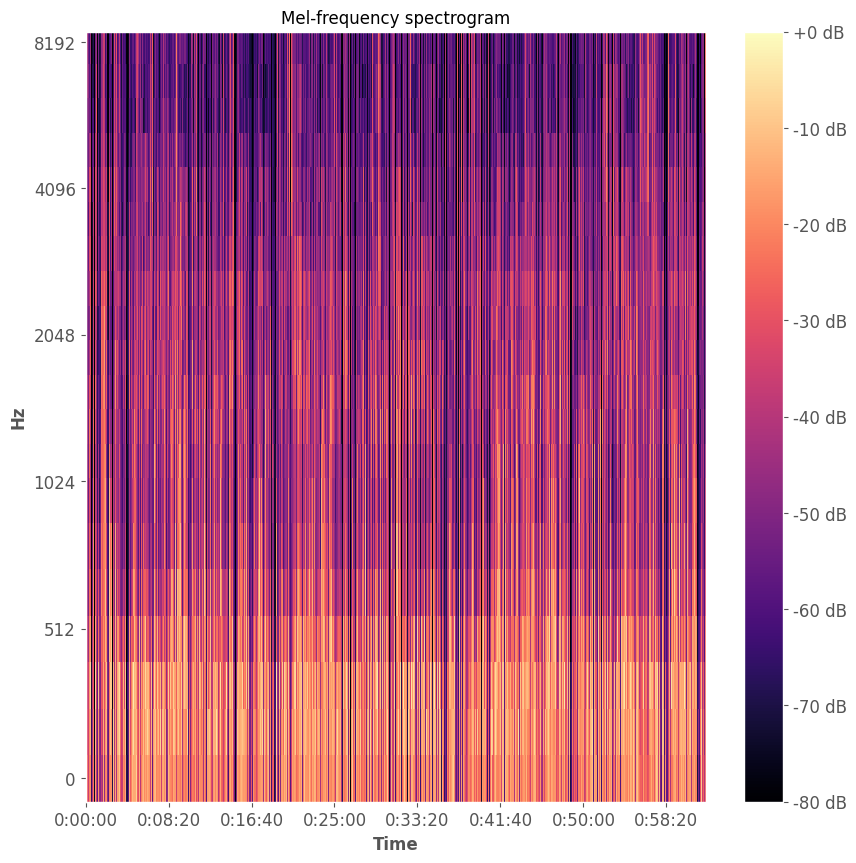

In [2]:
y,sr = librosa.load('/content/1st_29Sep.mp3')
dur_time = librosa.get_duration(y=y, sr=sr)
time_sec = round(dur_time)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=20, fmax=8000)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
#plt.xlim(60,120)

In [3]:
start = 0
end = time_sec
time_series_sec = np.linspace(start,end,len(S_dB[0]))

In [4]:
data = pd.read_csv('/content/VoiceData.csv')

In [5]:
def convert_to_sec(time_string):
    time_s_list = time_string.split(':')
    if len(time_s_list)>2:
        date_time = datetime.datetime.strptime(time_string, "%H:%M:%S")
        a_timedelta = date_time - datetime.datetime(1900, 1, 1)
        seconds = a_timedelta.total_seconds()
    else:
        date_time = datetime.datetime.strptime(time_string, "%M:%S")
        a_timedelta = date_time - datetime.datetime(1900, 1, 1)
        seconds = a_timedelta.total_seconds()
    return seconds

In [6]:
minute_list = data.minute.tolist()

In [7]:
SEC_LIST = []
for t in minute_list:
    try:
        SEC_LIST.append(convert_to_sec(t))
    except:
        SEC_LIST.append(0)
for k in range(2):
    for i in range(len(SEC_LIST)-1):
        if SEC_LIST[i]==SEC_LIST[i+1]:
            SEC_LIST[i+1]=SEC_LIST[i]+1
turn_index = SEC_LIST.index(0)
to_add = SEC_LIST[turn_index-1]
for j in range(turn_index,len(SEC_LIST)):
    SEC_LIST[j]=SEC_LIST[j]+to_add
data['Seconds']=SEC_LIST

In [8]:
data.head()

,speaker,minute,text,Seconds
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...,80.0
1,Chris Wallace,02:10,This debate is being conducted under health an...,130.0
2,Vice President Joe Biden,02:49,"How you doing, man?",169.0
3,President Donald J. Trump,02:51,How are you doing?,171.0
4,Vice President Joe Biden,02:51,I’m well.,172.0


In [9]:
new_data = data[data.Seconds<=time_series_sec.max()]
new_data.speaker = new_data.speaker.replace({'Chris Wallace:':'Chris Wallace'})

<ipython-input-9-f6cbfcc3fbdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.speaker = new_data.speaker.replace({'Chris Wallace:':'Chris Wallace'})


In [10]:
max_sec = new_data.Seconds.max()

In [11]:
new_data.drop_duplicates(subset='speaker')

,speaker,minute,text,Seconds
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...,80.0
2,Vice President Joe Biden,02:49,"How you doing, man?",169.0
3,President Donald J. Trump,02:51,How are you doing?,171.0


<ipython-input-12-5c6aecb95fd8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['speaker'] = new_data['speaker'].astype('category')
<ipython-input-12-5c6aecb95fd8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='speaker', data=new_data, palette='plasma', order=new_data['speaker'].value_counts().index)


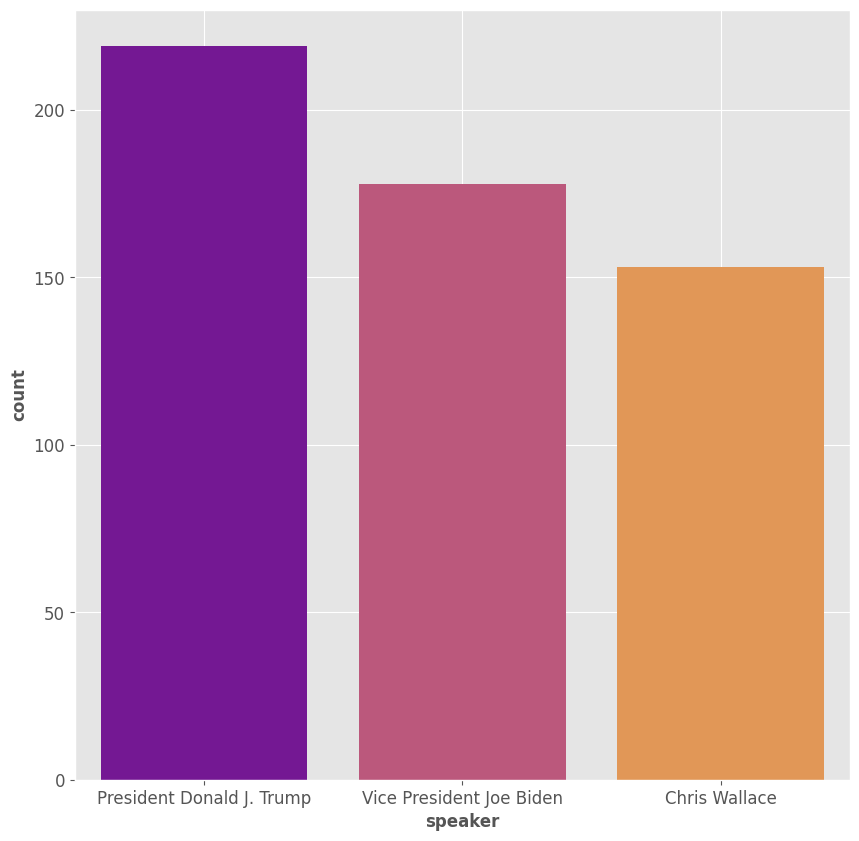

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming new_data['speaker'] is a categorical column, if not, convert it to one
new_data['speaker'] = new_data['speaker'].astype('category')

# Create countplot with specified order
sns.countplot(x='speaker', data=new_data, palette='plasma', order=new_data['speaker'].value_counts().index)
plt.grid(True)
plt.show()


In [13]:
audio_data = pd.DataFrame(S_dB)

In [14]:
audio_data = audio_data.T

In [15]:
audio_data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
160871,-21.171936,-20.503716,-17.784458,-15.409966,-28.006428,-34.709949,-28.826122,-25.874599,-26.760441,-39.389511,-44.569733,-41.370819,-39.170238,-45.234116,-47.561577,-48.049240,-45.029663,-39.523930,-35.930534,-35.518623
160872,-18.429787,-16.409618,-15.914625,-17.497648,-30.776737,-35.558800,-33.650791,-28.682037,-27.414268,-28.267620,-36.442436,-41.127659,-36.910007,-38.157116,-46.468853,-50.525238,-49.973083,-43.900513,-41.713802,-42.366837
160873,-17.029827,-14.422324,-14.485825,-20.897007,-25.803028,-29.003256,-36.679695,-35.955948,-28.465710,-22.043701,-30.200020,-39.410110,-33.810822,-33.661873,-42.185654,-50.757988,-54.683613,-49.456482,-49.118896,-51.019192
160874,-18.150955,-15.161835,-15.844000,-22.543438,-21.405937,-23.801527,-32.164444,-33.219227,-24.889263,-20.827980,-31.186043,-37.154884,-31.149122,-33.186119,-41.264652,-47.215134,-54.290771,-49.850338,-51.836433,-54.680164
160875,-19.719946,-17.096640,-18.392988,-24.809832,-19.509546,-21.658270,-29.019133,-27.584213,-19.864265,-22.659235,-34.232861,-36.255013,-31.597454,-36.330818,-42.794579,-44.828991,-53.038364,-50.102062,-52.536640,-52.608669


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(audio_data)

PCA(n_components=4)

In [17]:
pca_data = pd.DataFrame(pca.transform(audio_data))

In [18]:
audio_time = np.array(pca_data.index.tolist())*max_sec/np.array(pca_data.index.tolist()).max()
nd_time_list = [0]+new_data.Seconds.tolist()
CLASS = []
for j in range(len(audio_time)):
    time_j = audio_time[j]
    for i in range(1,len(nd_time_list)):
        start_i = nd_time_list[i-1]
        end_i = nd_time_list[i]
        if time_j>start_i and time_j<end_i:
            CLASS.append(new_data.loc[i-1].speaker)

In [19]:
pca_data['speaker']=CLASS[0:len(pca_data)]
pca_data['Time']=audio_time
pca_data.head()

,0,1,2,3,speaker,Time
0,166.353271,12.786086,23.802402,-4.855781,Chris Wallace,0.000000
1,152.314255,3.061110,12.214111,-0.332415,Chris Wallace,0.023049
2,144.840469,-0.053717,11.018284,-1.587380,Chris Wallace,0.046098
3,147.813614,1.729262,9.604019,-0.283230,Chris Wallace,0.069147
4,145.551453,2.747191,11.586065,-3.276639,Chris Wallace,0.092196


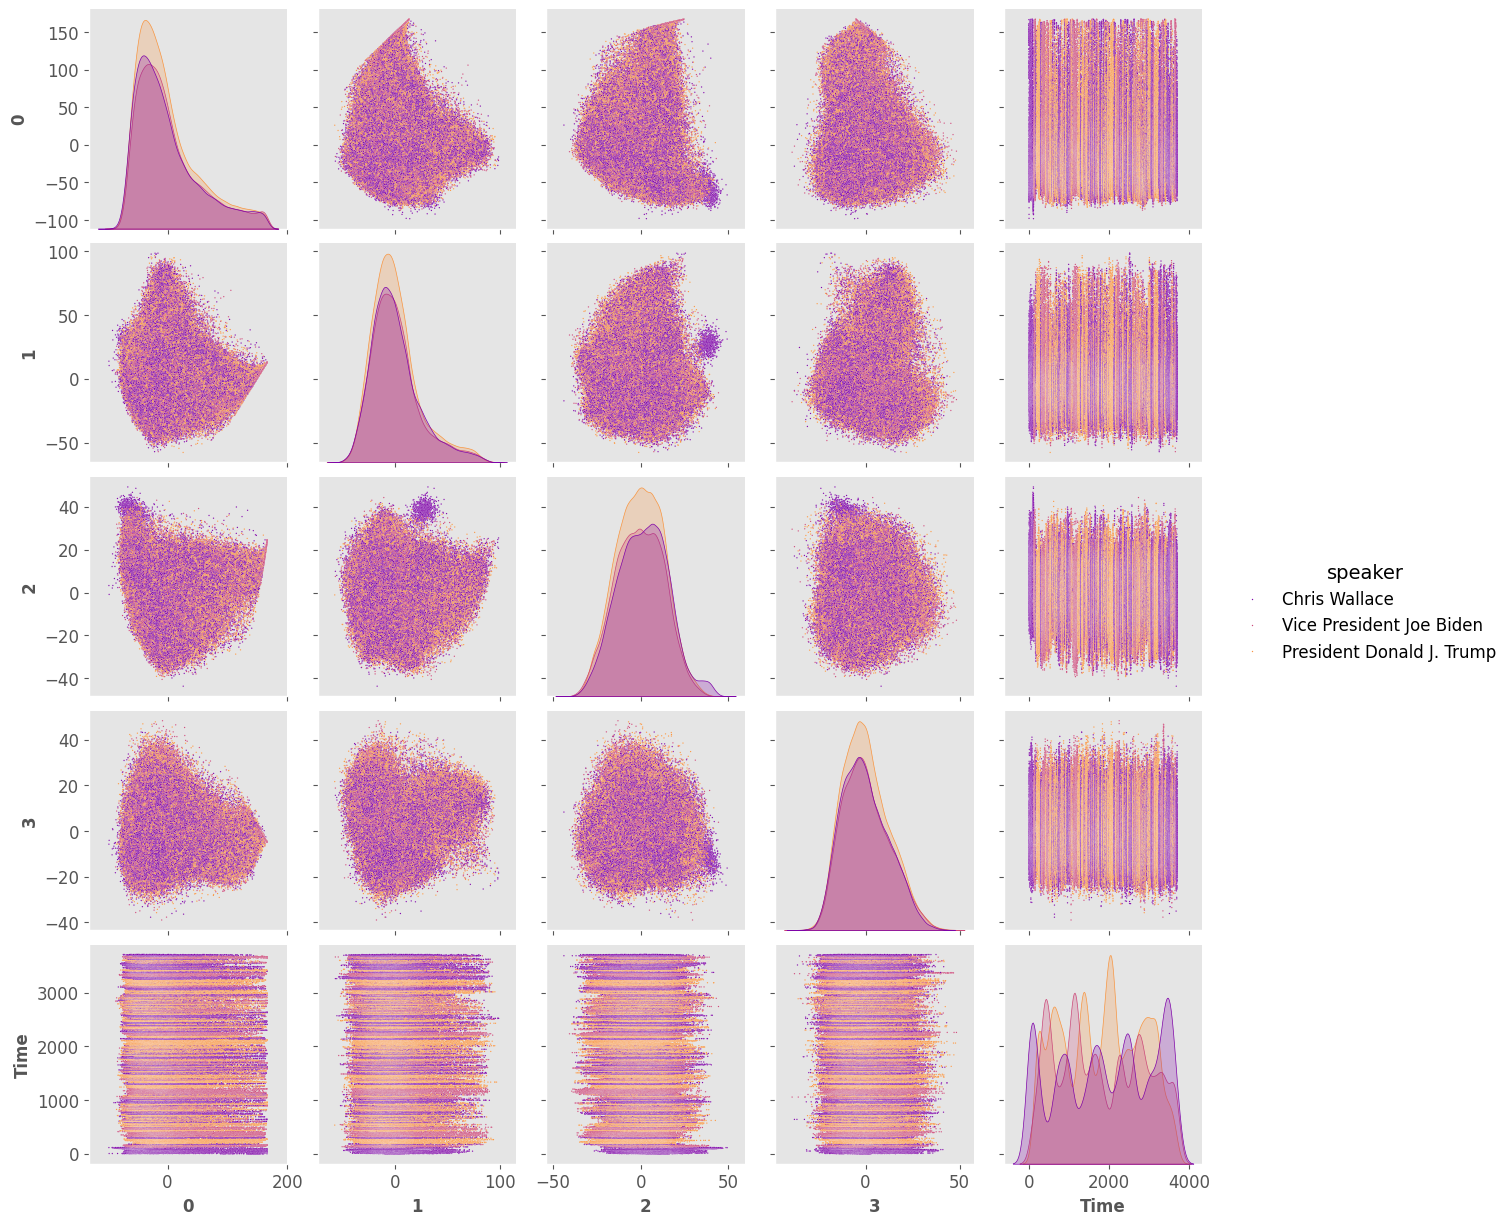

In [20]:
#plt.grid(True)
sns.pairplot(pca_data,hue='speaker',plot_kws={'s':1},palette='plasma')

In [21]:
from sklearn.feature_selection import mutual_info_classif as mi

In [22]:
mi(X=pca_data[['Time',0,1,2,3]],y=pca_data['speaker'])

array([1.08780774, 0.00241121, 0.        , 0.00779672, 0.        ])

In [23]:
time_series_data = pca_data[['Time',2,'speaker']]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


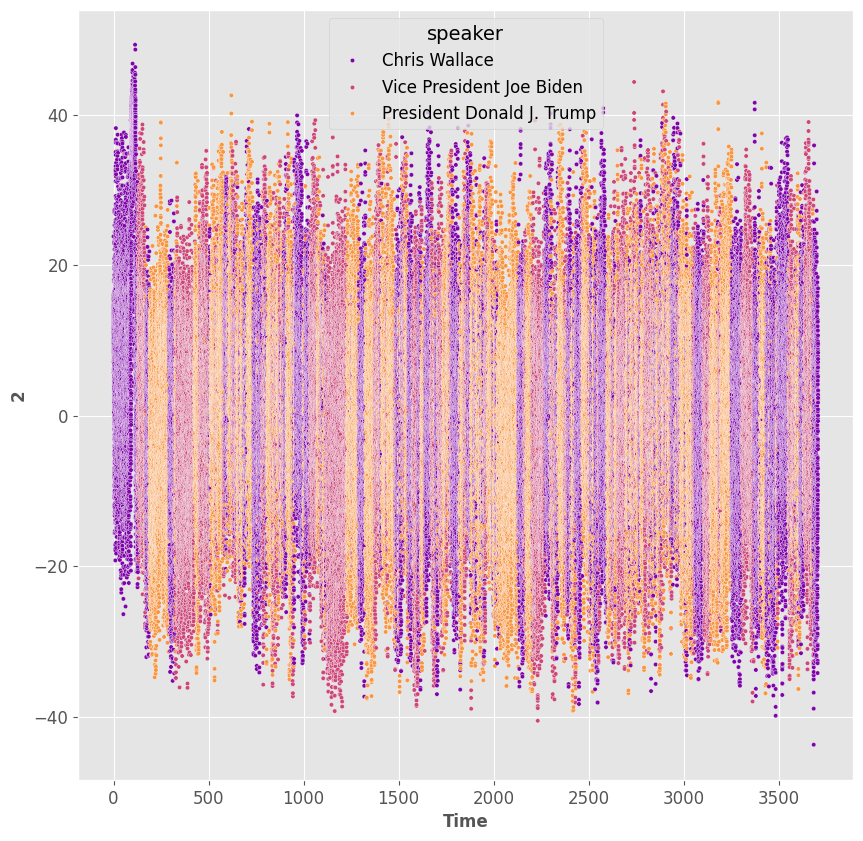

In [24]:
# @title
sns.scatterplot(x='Time', y=2, hue='speaker', data=time_series_data, s=10, palette='plasma')
plt.grid(True)
plt.show()


In [25]:
from sklearn.preprocessing import LabelEncoder

# Assuming time_series_data is your DataFrame
le = LabelEncoder()
time_series_data['speaker'] = le.fit_transform(time_series_data['speaker'])


<ipython-input-25-d9f42d9a4ef5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['speaker'] = le.fit_transform(time_series_data['speaker'])


In [26]:
encod_dic = {0:'Chris Wallace',2:'Vice President Joe Biden',1:'President Donald J. Trump'}

In [27]:
X=time_series_data[['Time','speaker']]
y=time_series_data.speaker

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [29]:
x_train = np.array(X_train)
x_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [30]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [31]:
num_classes = len(np.unique(y_train))

In [32]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [33]:
  def make_model(input_shape):
      input_layer = keras.layers.Input(input_shape)

      conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
      conv1 = keras.layers.BatchNormalization()(conv1)
      conv1 = keras.layers.ReLU()(conv1)

      conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
      conv2 = keras.layers.BatchNormalization()(conv2)
      conv2 = keras.layers.ReLU()(conv2)

      conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
      conv3 = keras.layers.BatchNormalization()(conv3)
      conv3 = keras.layers.ReLU()(conv3)

      gap = keras.layers.GlobalAveragePooling1D()(conv3)

      output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

      return keras.models.Model(inputs=input_layer, outputs=output_layer)


  model = make_model(input_shape=x_train.shape[1:])
  #keras.utils.plot_model(model, show_shapes=True)

In [34]:
epochs = 30
batch_size = 50

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/30
2060/2060 [==============================] - 15s 6ms/step - loss: 0.3227 - sparse_categorical_accuracy: 0.8452 - val_loss: 6.2811 - val_sparse_categorical_accuracy: 0.4140 - lr: 0.0010
Epoch 2/30
  24/2060 [..............................] - ETA: 9s - loss: 0.0485 - sparse_categorical_accuracy: 0.9950

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2060/2060 [==============================] - 12s 6ms/step - loss: 0.0162 - sparse_categorical_accuracy: 0.9957 - val_loss: 0.0097 - val_sparse_categorical_accuracy: 1.0000 - lr: 0.0010
Epoch 3/30
2060/2060 [==============================] - 12s 6ms/step - loss: 0.0174 - sparse_categorical_accuracy: 0.9947 - val_loss: 8.9480 - val_sparse_categorical_accuracy: 0.4218 - lr: 0.0010
Epoch 4/30
2060/2060 [==============================] - 12s 6ms/step - loss: 0.0125 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.0054 - val_sparse_categorical_accuracy: 1.0000 - lr: 0.0010
Epoch 5/30
2060/2060 [==============================] - 12s 6ms/step - loss: 0.0126 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.0028 - val_sparse_categorical_accuracy: 1.0000 - lr: 0.0010
Epoch 6/30
2060/2060 [==============================] - 12s 6ms/step - loss: 0.0124 - sparse_categorical_accuracy: 0.9962 - val_loss: 0.3222 - val_sparse_categorical_accuracy: 0.8606 - lr: 0.0010
Epoch 7/30
2060/2060 [=========

In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

1006/1006 [==============================] - 2s 2ms/step - loss: 0.7462 - sparse_categorical_accuracy: 0.8369
Test accuracy 0.8368659615516663
Test loss 0.7461766004562378


In [42]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", input_shape=input_shape),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),

    keras.layers.Conv1D(filters=64, kernel_size=3, padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),

    keras.layers.Conv1D(filters=64, kernel_size=3, padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),

    keras.layers.GlobalAveragePooling1D(),

    keras.layers.Dense(num_classes, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Print model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 100, 64)           640       
                                                                 
 batch_normalization_9 (Bat  (None, 100, 64)           256       
 chNormalization)                                                
                                                                 
 re_lu_9 (ReLU)              (None, 100, 64)           0         
                                                                 
 conv1d_10 (Conv1D)          (None, 100, 64)           12352     
                                                                 
 batch_normalization_10 (Ba  (None, 100, 64)           256       
 tchNormalization)                                               
                                                                 
 re_lu_10 (ReLU)             (None, 100, 64)          

In [47]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

# Assuming you have x_train, y_train, x_test, and y_test defined
# Assuming num_classes is correctly set
# Assuming input_shape is correctly set based on your data dimensions
# Assuming epochs, batch_size, etc., are defined

# One-hot encode labels
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# Build the model
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", input_shape=input_shape),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),

    keras.layers.Conv1D(filters=64, kernel_size=3, padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),

    keras.layers.Conv1D(filters=64, kernel_size=3, padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),

    keras.layers.GlobalAveragePooling1D(),

    keras.layers.Dense(num_classes, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train_one_hot, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/30


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 100, 3), found shape=(None, 2, 1)


In [44]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, BatchNormalization, ReLU, GlobalAveragePooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have x_train, y_train, x_test, and y_test defined
# Assuming num_classes is correctly set

# One-hot encode labels
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

model = keras.models.Sequential([
    Conv1D(filters=128, kernel_size=3, padding="same", input_shape=(input_shape)),
    BatchNormalization(),
    ReLU(),

    Conv1D(filters=128, kernel_size=3, padding="same"),
    BatchNormalization(),
    ReLU(),

    Conv1D(filters=128, kernel_size=3, padding="same"),
    BatchNormalization(),
    ReLU(),

    GlobalAveragePooling1D(),

    Dense(256, activation="relu"),
    BatchNormalization(),
    Dense(num_classes, activation="softmax")
])

model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(x_train, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/50


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 100, 3), found shape=(None, 2, 1)
